In [34]:
import numpy as np
import scipy as sp
import scipy.constants as cons
import matplotlib.pyplot as plt

In [3]:
def position(theta, length):
    pos = np.array([np.sin(theta)*length, -np.cos(theta)*length]).T
    return pos

In [31]:
def get_alpha(theta, length):
        return -cons.g/length * np.sin(theta)

In [25]:
def runge_kutta_1(theta, omega, length, dt=1e-3):   
    alpha = get_alpha(theta, length)
    nomega = omega + alpha*dt
    # ntheta = (theta + nomega*dt) % (2*np.pi)
    ntheta = theta + nomega*dt
    return ntheta, nomega

In [6]:
def runge_kutta_2(theta, omega, length, dt=1e-3):

    k1o = get_alpha(theta, length)
    k2o = get_alpha(theta+0.5*k1o*dt, length)    
    nomega = omega + k2o*dt

    k1t = nomega
    k2t = nomega + 0.5*k1t*dt
    ntheta = theta + k2t*dt

    return ntheta, nomega


In [7]:
def runge_kutta_3(theta, omega, length, dt=1e-3):

    k1o = get_alpha(theta, length)
    k2o = get_alpha(theta+0.5*k1o*dt, length)
    k3o = get_alpha(theta+(2*k2o - k1o)*dt, length)
    nomega = omega + (k1o + 4*k2o + k3o)*dt/6
    
    k1t = nomega
    k2t = nomega + 0.5*k1t*dt
    k3t = nomega + (2*k2t-k1t)*dt
    ntheta = theta + (k1t + 4*k2t + k3t)*dt/6

    return ntheta, nomega

In [10]:
def runge_kutta_4(theta, omega, length, dt=1e-3):

    k1o = get_alpha(theta, length)
    k2o = get_alpha(theta+0.5*k1o*dt, length)
    k3o = get_alpha(theta+0.5*k2o*dt, length)
    k4o = get_alpha(theta+k3o*dt, length)
    nomega = omega + (k1o + 2*k2o + 2*k3o + k4o)*dt/6

    k1t = nomega
    k2t = nomega + 0.5*k1t*dt
    k3t = nomega + 0.5*k2t*dt
    ntheta = theta + (k1t + 2*k2t + 2*k3t + k3t)*dt/6

    return ntheta, nomega

In [36]:
def simulate(times, theta_0, length, dt=1e-3, step_fn=runge_kutta_1):
    # times = np.arange(num_steps)*dt
    num_steps = len(times)
    pos = np.ndarray((num_steps, 2))
    theta_arr = np.zeros(num_steps)
    theta = theta_0
    omega = 0
    for t in range(num_steps):
        theta_arr[t] = theta
        pos[t] = position(theta, length)
        theta, omega = step_fn(theta, omega, length, dt)
    return pos, theta_arr

No handles with labels found to put in legend.


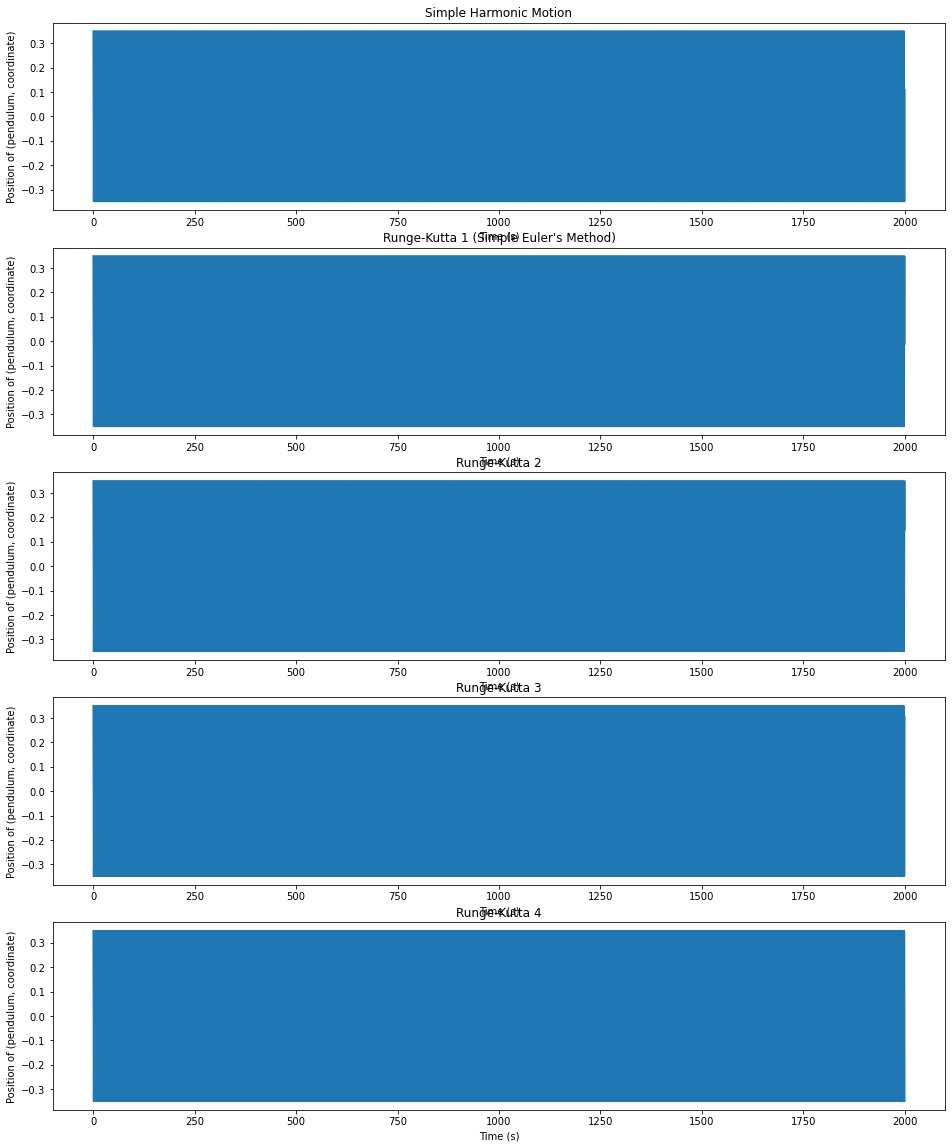

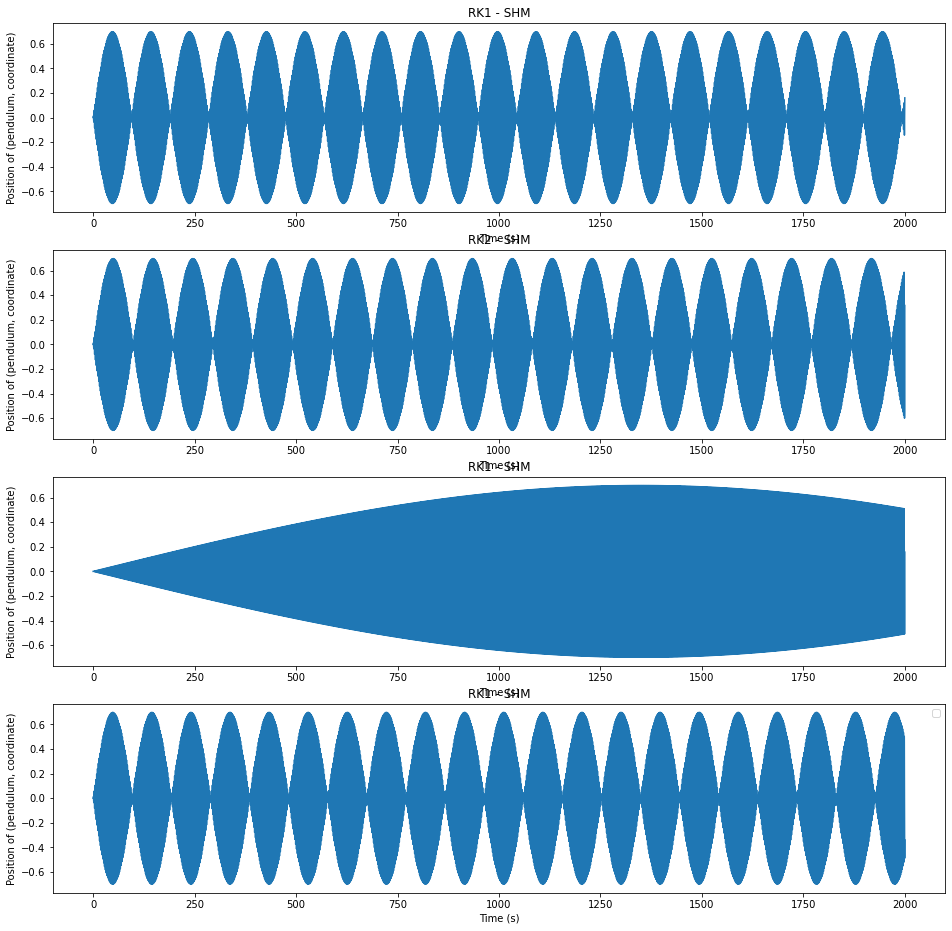

In [141]:
theta_0 = np.pi / 180 * np.array([20])
length = np.array(1)
deltatime = 1e-2
duration = 2000
times = np.arange(0, duration, deltatime)

_, axs = plt.subplots(5, figsize=(16,20))
for ax in axs:
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Position of (pendulum, coordinate)")

theta_shm = theta_0 * np.cos( np.sqrt(cons.g / length) * times)
ax = axs[0]
ax.plot(times, theta_shm)
ax.set_title("Simple Harmonic Motion")

pos, theta_rk1 = simulate(times, theta_0, length, step_fn=runge_kutta_1, dt=deltatime)
ax = axs[1]
ax.plot(times, theta_rk1)
ax.set_title("Runge-Kutta 1 (Simple Euler's Method)")
# for i in range(2):
#   plt.plot(time, pos[:, i], label="{0}".format(i))

pos, theta_rk2 = simulate(times, theta_0, length, step_fn=runge_kutta_2, dt=deltatime)
ax = axs[2]
ax.plot(times, theta_rk2)
ax.set_title("Runge-Kutta 2")

pos, theta_rk3 = simulate(times, theta_0, length, step_fn=runge_kutta_3, dt=deltatime)
ax = axs[3]
ax.plot(times, theta_rk3)
ax.set_title("Runge-Kutta 3")

pos, theta_rk4 = simulate(times, theta_0, length, step_fn=runge_kutta_4, dt=deltatime)
ax = axs[4]
ax.plot(times, theta_rk4)
ax.set_title("Runge-Kutta 4")

_, axs = plt.subplots(4, figsize=(16,16))

axs[0].plot(times, theta_rk2-theta_rk1)
axs[0].set_title(r'RK1 - SHM')
axs[1].plot(times, theta_rk3-theta_rk1)
axs[1].set_title(r'RK2 - SHM')
axs[2].plot(times, theta_rk3-theta_rk2)
axs[2].set_title(r'RK1 - SHM')
axs[3].plot(times, theta_rk4-theta_rk1)
axs[3].set_title(r'RK1 - SHM')

for ax in axs:
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Position of (pendulum, coordinate)")

plt.legend()
plt.show()

965.407

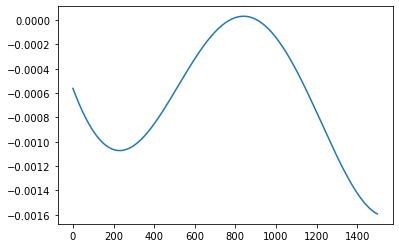

In [140]:
diff = (theta_rk2-theta_rk1)[964500:966000]

plt.plot(diff)

np.where(np.abs(diff) < 1e-7)

times[907+964500]
# diff[907]